In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sandstone.tif to sandstone (1).tif


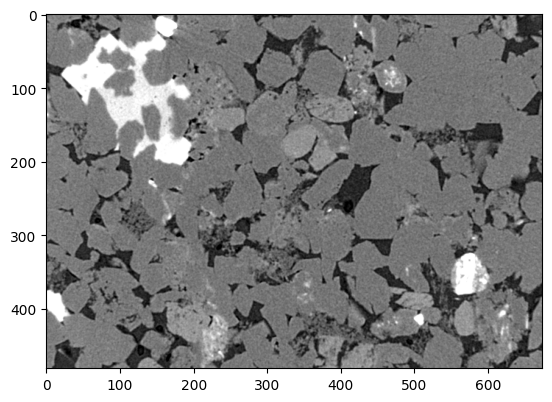

In [ ]:
img=cv2.imread('sandstone (1).tif')
img1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

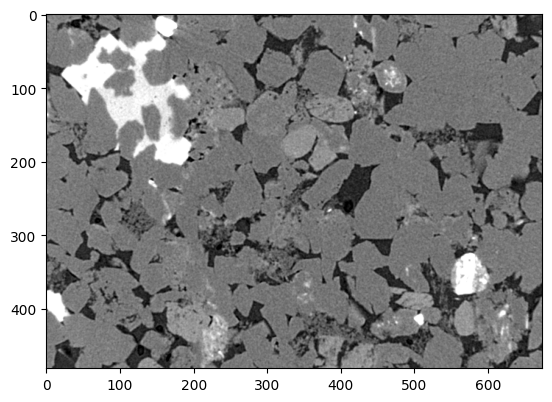

In [ ]:
img=cv2.imread('sandstone.tif',0)
plt.imshow(img,cmap='gray')

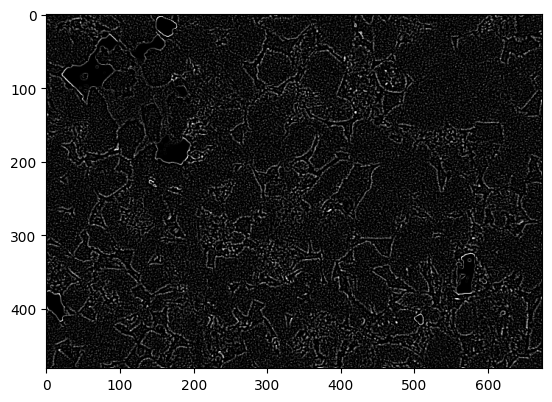

In [ ]:
mask=np.matrix('-1 -1 -1; -1 8 -1; -1 -1 -1')
img2=cv2.filter2D(img,-1,mask)
plt.imshow(img2,cmap='gray')

In [ ]:
from skimage.filters import roberts, sobel, scharr, prewitt

edge_roberts = roberts(img)
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

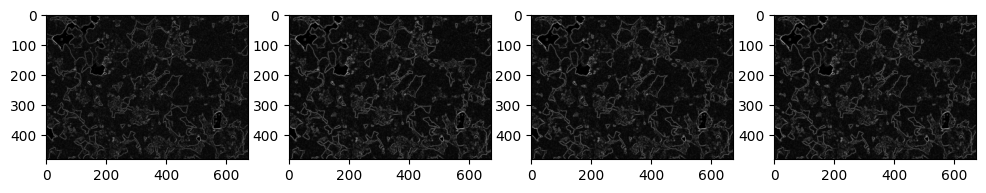

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,4,1)
plt.imshow(edge_roberts,cmap = 'gray')
plt.subplot(2,4,2)
plt.imshow(edge_sobel,cmap = 'gray')
plt.subplot(2,4,3)
plt.imshow(edge_scharr,cmap = 'gray')
plt.subplot(2,4,4)
plt.imshow(edge_scharr,cmap = 'gray')


In [ ]:
#Canny edge detection

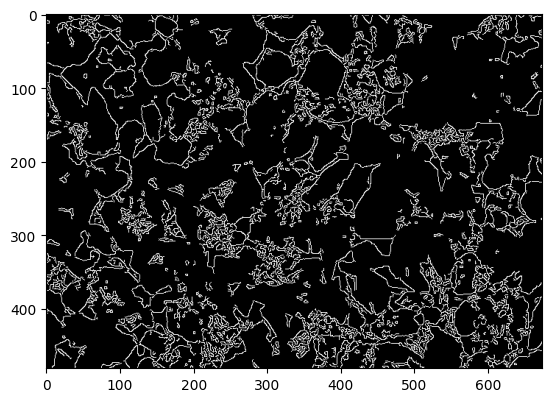

In [ ]:
canny_edge=cv2.Canny(img,100,200)
plt.imshow(canny_edge,cmap='gray')

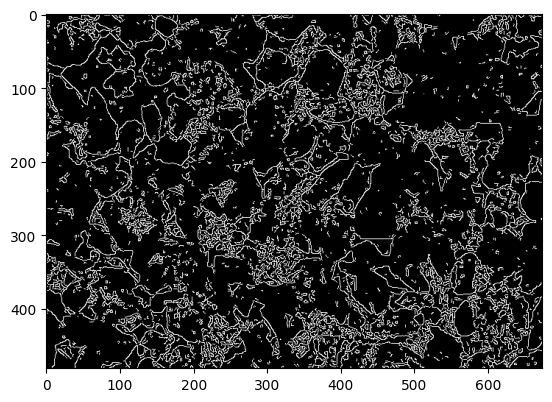

In [ ]:
sigma=0.2
median=np.median(img)
lower=int(max(0,(1.0-sigma)*median))
upper=int(min(255,(1.0+sigma)*median))
auto=cv2.Canny(img,lower,upper)
plt.imshow(auto,cmap='gray')

#Fourier transform

In [ ]:
dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)

In [ ]:
dft.shape

(481, 674, 2)

In [ ]:
img.shape

(481, 674)

In [ ]:
dft_shift=np.fft.fftshift(dft)

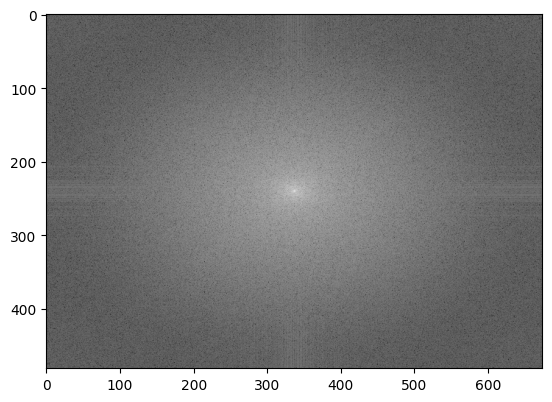

In [ ]:
plt.magnitude_spectrum=20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(plt.magnitude_spectrum,cmap='gray')

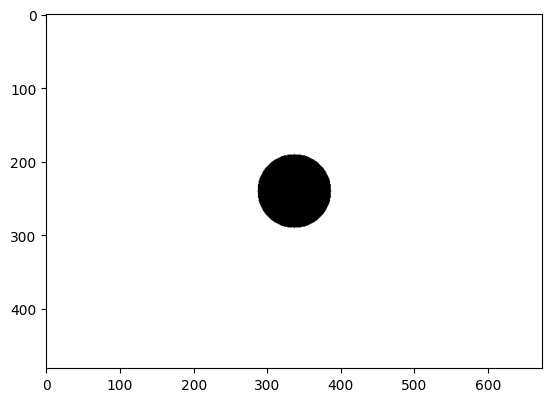

In [ ]:
rows,cols=img.shape
crow,ccol=rows//2,cols//2
mask=np.ones((rows,cols,2),np.uint8)
r=50
center=[crow,ccol]
x,y=np.ogrid[:rows,:cols]
mask_area=(x-center[0])**2+(y-center[1])**2<=r*r
mask[mask_area]=0
plt.imshow(mask[:,:,0].astype('uint8'),cmap='gray')

In [ ]:
fshift=dft_shift*mask

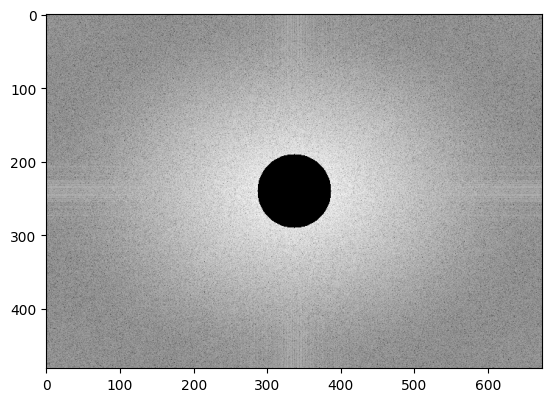

In [ ]:
fshift_mas_mag=20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1])+1)
plt.imshow(fshift_mas_mag,cmap='gray')

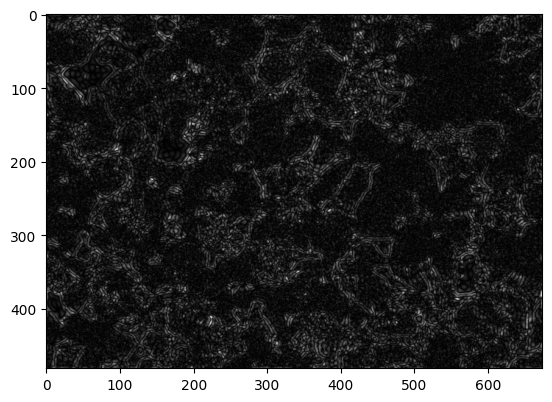

In [ ]:
fshift=np.fft.ifftshift(fshift)
img_back=cv2.idft(fshift)
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.imshow(img_back,cmap='gray')